# Stack Overflow

## Introduction 

In the second part of this assignment, we will create and analyze time series of creation dates of Stack Overflow questions. This assignment is to be completed **INDIVIDUALLY** and it is due on **October 7 at 7pm**.

Let's create some time series from the data. You may choose to analyze either users or tags. To analyze users, take the top 100 users with the most question posts. For each user, your time series will be the number of questions posted by that user at some frequency. To analyze tags, take the top 100 most popular question tags. For each tag, your time series will be the number of questions with that tag at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze tags and sample during different hours of the day, your hypothesis could be that languages (i.e. Javascript) that are used more in industry will have more questions posted during work hours, whereas languages (i.e. Python) that are taught in academia will have more questions posted after midnight when students are scrambling to finish their homework.

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data, what timeseries you created, what method you chose and why. **(30 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

In [1]:
import pandas as pd
from pandas import DataFrame
#uncompress the .zip before read the csv please
df = pd.read_csv('question_dataframe.csv',index_col=0)

In [2]:
#get top 100 user
top_100_user_df =df.groupby(['OwnerUserId']).count().sort_values(['Id'],ascending=False)[0:100].reset_index()

In [3]:
#get rid of those user who are not in top_100
refinded_df_with_top_100 = df[df['OwnerUserId'].isin(top_100_user_df['OwnerUserId'].tolist())]

In [4]:
#make index right
df2 = refinded_df_with_top_100.reset_index().drop('index',1)

In [5]:
#convert str to datetime type
df2['CreationDate'] = pd.to_datetime(df2['CreationDate'])

In [6]:
#user datetime as index for resampling
df3 = df2.set_index('CreationDate')

In [7]:
import numpy as np
#change ID value for counting
df3['Id'] = 1
#change col to make df more readable
df3 = df3.rename(columns = {'Id':'Num_of_questions'})
#Use an Id as a group, do resample by month, and get sum
new_df = df3.groupby('OwnerUserId').resample('M').sum()

In [8]:
import math
def distance_alg(method,t1,t2):
    if method == "euclid_dist": return math.sqrt(((t1.add(-t2,fill_value=0))**2).sum())
    if method == "L1_dist": return ((t1.add(-t2,fill_value=0)).abs()).sum().values[0]

In [9]:
def find_similarity(method):
    #[distance,userId1,userId2]
    most_similar = [1000,"",""]
    most_dissimilar = [0,"",""]
    for userId1 in new_df.index.levels[0]:
        for userId2 in new_df.index.levels[0]:
            dist = distance_alg(method,new_df.loc[userId1],new_df.loc[userId2])
            if dist < most_similar[0] :
                if userId1 != userId2:
                    most_similar[0] = dist
                    most_similar[1] = userId1
                    most_similar[2] = userId2
            if dist > most_dissimilar[0] :
                most_dissimilar[0] = dist
                most_dissimilar[1] = userId1
                most_dissimilar[2] = userId2
    return [most_similar,most_dissimilar]

In [10]:
re_array = find_similarity("euclid_dist")

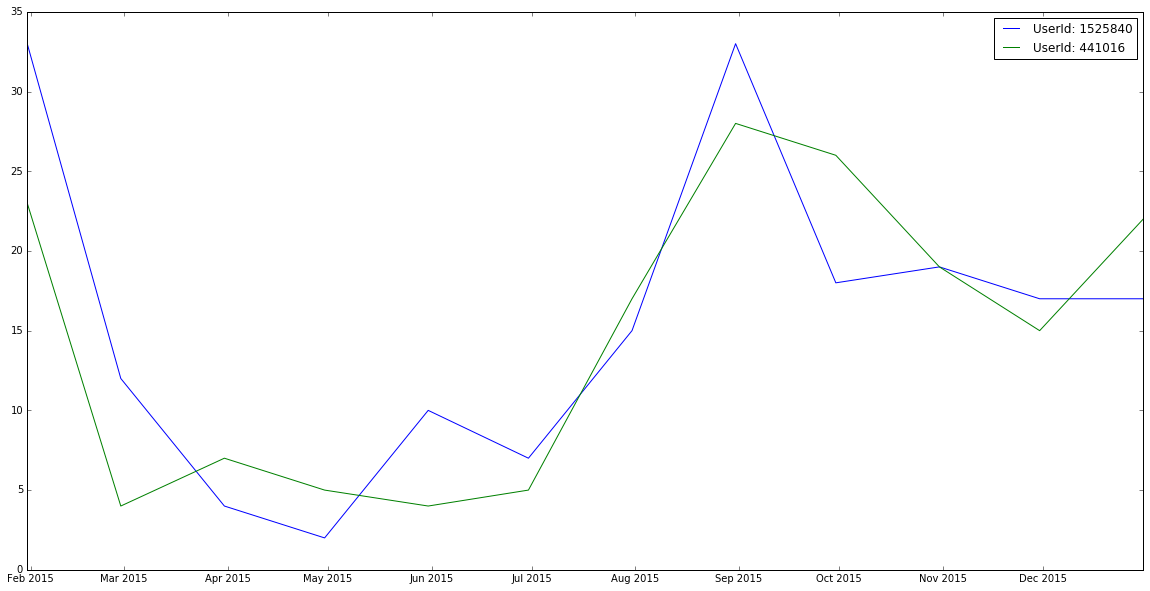

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
s1 = plt.plot(new_df.loc[re_array[0][1]],label="UserId: " + re_array[0][1])
s2 = plt.plot(new_df.loc[re_array[0][2]],label="UserId: " + re_array[0][2])
plt.legend(loc='upper right')
plt.show()

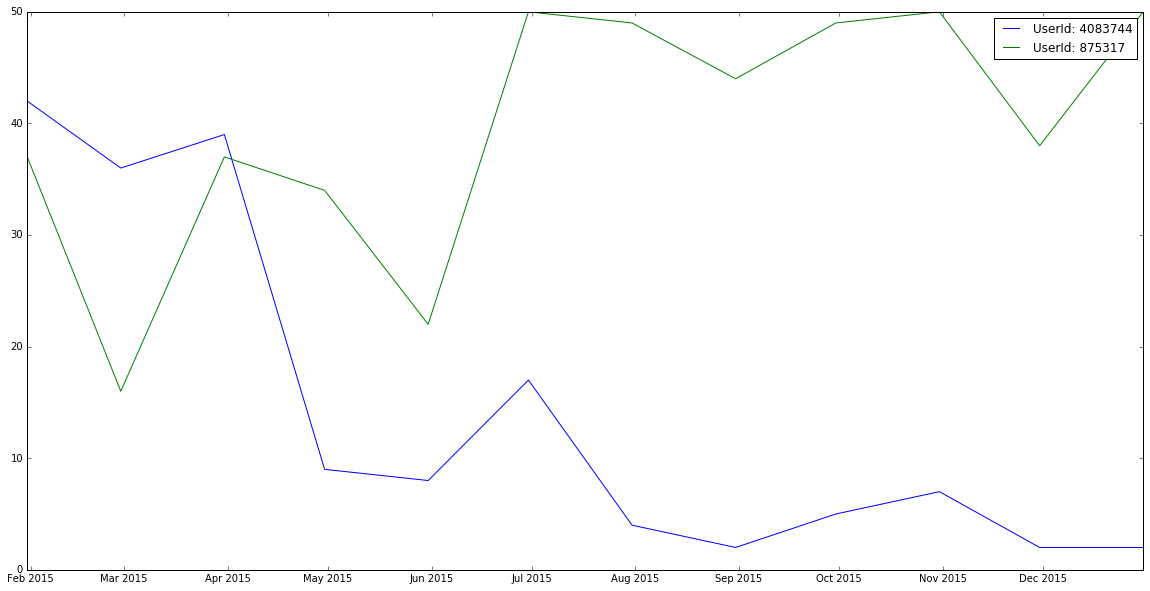

In [12]:
plt.figure(figsize=(20,10))
s1 = plt.plot(new_df.loc[re_array[1][1]],label="UserId: " + re_array[1][1])
s2 = plt.plot(new_df.loc[re_array[1][2]],label="UserId: " + re_array[1][2])
plt.legend(loc='upper right')
plt.show()

My hypothesis is that students usually have more quesions during semester time like February to May and September to December and less questions during summer break and winter break and professions may have similar number  questions in whole year except December because of Christmas. I choose to analyze the number of questions has been asked by each users in every month of 2015. During my research, I found that some users have no question in some months. What I guess is that those users may haven't registered for stack overflow or they might have no qeustion. It is difficult to decide what their situations are. So what I assume is that when the data in some months are missed, I would consider it as 0 question. Based on this assumption, I did the analysis above. I choose Euclidean distance to compare users because Eclidian distance can represent the similarity more accurately when object has simple attributes and can be implement easily.

Choose a different distance/similarity metric and repeat the same time series analysis. Compare the two different metrics you used. **(10 pts)**

In [13]:
re_array = find_similarity("L1_dist")

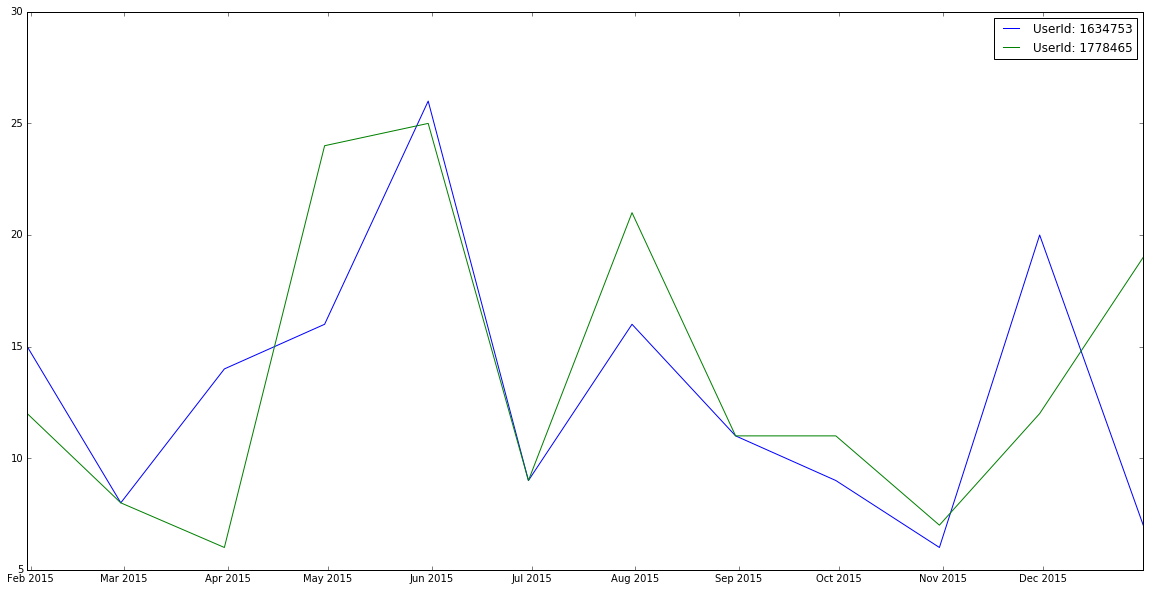

In [14]:
plt.figure(figsize=(20,10))
s1 = plt.plot(new_df.loc[re_array[0][1]],label="UserId: " + re_array[0][1])
s2 = plt.plot(new_df.loc[re_array[0][2]],label="UserId: " + re_array[0][2])
plt.legend(loc='upper right')
plt.show()

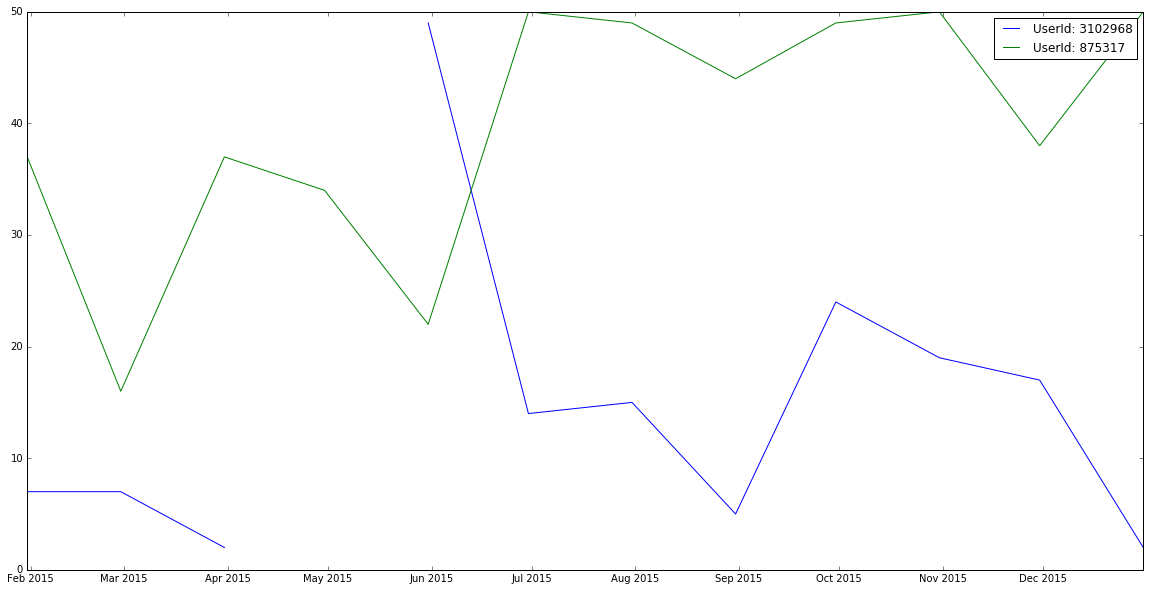

In [15]:
plt.figure(figsize=(20,10))
s1 = plt.plot(new_df.loc[re_array[1][1]],label="UserId: " + re_array[1][1])
s2 = plt.plot(new_df.loc[re_array[1][2]],label="UserId: " + re_array[1][2])
plt.legend(loc='upper right')
plt.show()

The results computed from L1 distance are different from the previous results. The two most similar usres I got from euclidean distance seems more accurate than the result of L1 distance.